# Tu nombre: Ulises Gallardo Rodríguez 

## Clase de Procesamiento de Lenguaje Natural

## Práctica 4: Esquemas de Pesado DOR Y TCOR

In [1]:

def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []
    
    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for tuit in f_corpus:
            tr_txt += [tuit]
            
        for label in f_truth:
            tr_y += [label]
            
    return tr_txt, tr_y
        

In [2]:
tr_txt, tr_y = get_texts_from_file("./mex_train.txt", "./mex_train_labels.txt")

In [3]:
len(tr_txt)

5544

In [4]:
len(tr_y)

5544

Counter({'0\n': 3563, '1\n': 1981})


Text(0.5, 0, 'Class')

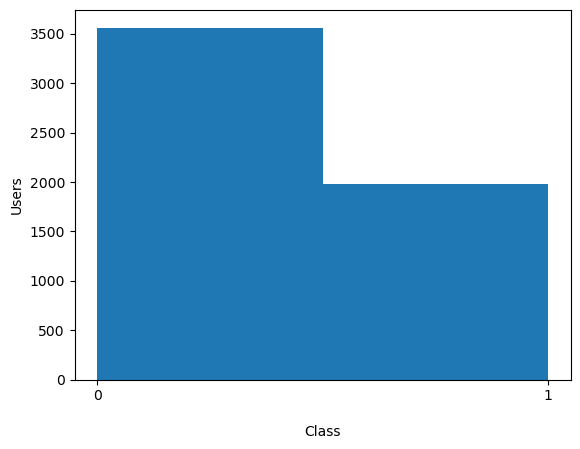

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(tr_y))
plt.hist(tr_y, bins=len(set(tr_y)))

plt.ylabel('Users')
plt.xlabel('Class')



In [6]:
tr_txt[:10]

['lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl\n',
 'a la vga no seas mamón 45 putos minutos después me dices que apenas sales no me querías avisar en 3 horas? 😑\n',
 'considero que lo más conveniente seria que lo retes a unos vergazos mi jelipe! rómpele la madre a ese pinchi joto!\n',
 'el marica de mi ex me tiene bloqueada de todo así  uno no puede admirar la "belleza" de su garnacha 😂\n',
 'mujer despechadaya pinche amlo hazle esta que se pela la loca #reynosafollow #reynosa\n',
 'putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos\n',
 'ustedes si puden andar de chanceros pero cuidadito y seamos nosotras porque luego luego empiezan a mamar hijos de la chingada.\n',
 '@usuario jajjaja te digo esa madre si está buena ajjaja\n',
 'odio los putos trámites de titulación 😡😡😡😡😡😡😡😡😡😡😡 pero me urge la precedula.\n',
 '@usuario no te equivocabas mi madre y tu tenían muchísima razón siempre es mejor lo que viene 

In [7]:
tr_txt[5]

'putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos\n'

In [8]:
tr_txt[5].split()

['putos.',
 'no',
 'tienen',
 'madre.',
 'ambriados',
 'mantenidos.',
 'ojetes.',
 'como',
 'es',
 'posible.',
 'mejor',
 'matarlos']

In [9]:
import nltk
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

# Tokenizar un tuit



In [10]:
tokenizer.tokenize(tr_txt[5])

['putos',
 '.',
 'no',
 'tienen',
 'madre',
 '.',
 'ambriados',
 'mantenidos',
 '.',
 'ojetes',
 '.',
 'como',
 'es',
 'posible',
 '.',
 'mejor',
 'matarlos']

In [11]:
tokenizer.tokenize("Hola @nick como estas #felizddia!!!")

['Hola', '@nick', 'como', 'estas', '#felizddia', '!', '!', '!']

In [12]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)

In [13]:
len(set(corpus_palabras))

13581

In [14]:
fdist = nltk.FreqDist(corpus_palabras)

In [15]:
fdist

FreqDist({'que': 3383, 'de': 3357, '.': 2774, 'a': 2629, 'la': 2433, 'y': 2266, 'no': 1824, 'me': 1613, '!': 1505, 'el': 1303, ...})

In [16]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [17]:
V = sortFreqDict(fdist)

In [18]:
V = V[:5000]

In [19]:
dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word]=cont
    cont += 1    

In [20]:
dict_indices

{'que': 0,
 'de': 1,
 '.': 2,
 'a': 3,
 'la': 4,
 'y': 5,
 'no': 6,
 'me': 7,
 '!': 8,
 'el': 9,
 '@usuario': 10,
 'en': 11,
 'verga': 12,
 'madre': 13,
 'se': 14,
 'putas': 15,
 'los': 16,
 'es': 17,
 'putos': 18,
 '?': 19,
 'con': 20,
 'por': 21,
 'mi': 22,
 'un': 23,
 'te': 24,
 'ya': 25,
 'si': 26,
 '"': 27,
 'lo': 28,
 'las': 29,
 'como': 30,
 'para': 31,
 'loca': 32,
 'su': 33,
 'tu': 34,
 'una': 35,
 '...': 36,
 'pero': 37,
 'le': 38,
 '😂': 39,
 'al': 40,
 'del': 41,
 'más': 42,
 'yo': 43,
 'pinche': 44,
 'cuando': 45,
 'puta': 46,
 'qué': 47,
 'todos': 48,
 'o': 49,
 ':': 50,
 'bien': 51,
 'son': 52,
 'estoy': 53,
 '¿': 54,
 'les': 55,
 'hdp': 56,
 'porque': 57,
 'sus': 58,
 'todo': 59,
 'joto': 60,
 'ni': 61,
 'hasta': 62,
 'esta': 63,
 'está': 64,
 '…': 65,
 'marica': 66,
 'ser': 67,
 'q': 68,
 'así': 69,
 'soy': 70,
 'vale': 71,
 'hay': 72,
 'puto': 73,
 'eso': 74,
 'pinches': 75,
 'voy': 76,
 'mis': 77,
 'ver': 78,
 'este': 79,
 'quiero': 80,
 'solo': 81,
 'luchona': 82,
 '

In [21]:
import numpy as np

def build_bow_tr(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    
    # CONSTRUCCIÓN DE LA BOLSA DE PALABRAS
    
    cont_doc = 0
    for tr in tr_txt:        
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in fdist_doc: 
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc +=1
    
    
    return BOW

In [22]:
BOW_tr=build_bow_tr(tr_txt,V, dict_indices)

In [23]:
BOW_tr.shape

(5544, 5000)

In [24]:
BOW_tr[0,:]

array([1, 2, 0, ..., 0, 0, 0])

# Bolsa de Terminos Validación

Counter({'0\n': 397, '1\n': 219})


Text(0.5, 0, 'Class')

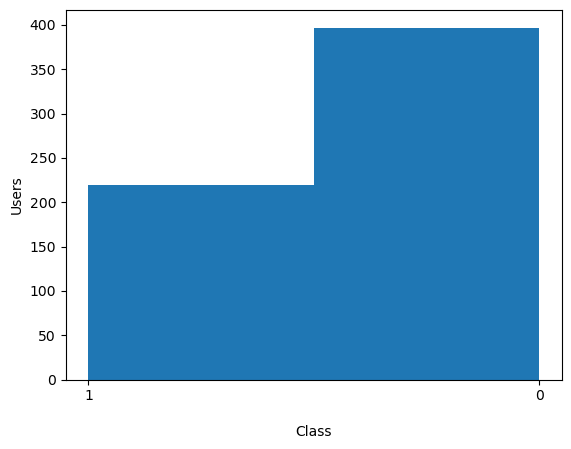

In [25]:
val_txt, val_y = get_texts_from_file("./mex_val.txt", "./mex_val_labels.txt")

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(val_y))
plt.hist(val_y, bins=len(set(val_y)))

plt.ylabel('Users')
plt.xlabel('Class')


In [26]:
BOW_val = build_bow_tr(val_txt, V, dict_indices)

In [27]:
BOW_val.shape

(616, 5000)

# Clasificación

In [28]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_fscore_support

parameters = {'C' : [.05, .25, 1, 2]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, 
                    param_grid=parameters, 
                    n_jobs=8, scoring="f1_macro", 
                    cv=5)

tr_y = list(map(int,tr_y))
grid.fit(BOW_tr, tr_y)

val_y = list(map(int, val_y))
y_pred=grid.predict(BOW_val)

p, r, f, _ =precision_recall_fscore_support(val_y, y_pred, average="macro", pos_label=1)


print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[334  63]
 [ 49 170]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       397
           1       0.73      0.78      0.75       219

    accuracy                           0.82       616
   macro avg       0.80      0.81      0.80       616
weighted avg       0.82      0.82      0.82       616



# TF

In [29]:
def build_tf_tr(tr_txt, V, dict_indices):
    TF = np.zeros((len(tr_txt),len(V)), dtype=float)
    
    for idx_doc, tr in enumerate(tr_txt):        
        frecuencia = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in frecuencia:
            #print(word, frecuencia.freq(word))
            if word in dict_indices:
                TF[idx_doc,dict_indices[word]] = frecuencia.freq(word)    
    return TF

In [30]:
TF_tr = build_tf_tr(tr_txt,V, dict_indices)

In [31]:
TF_val = build_tf_tr(val_txt, V, dict_indices)

In [32]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_fscore_support

parameters = {'C' : [.05, .25, 1, 2]}

svr = svm.LinearSVC(class_weight='balanced', max_iter=90000)
grid = GridSearchCV(estimator=svr, 
                    param_grid=parameters, 
                    n_jobs=8, scoring="f1_macro", 
                    cv=5)

tr_y = list(map(int,tr_y))
grid.fit(TF_tr, tr_y)

val_y = list(map(int, val_y))
y_pred=grid.predict(TF_val,)

p, r, f, _ =precision_recall_fscore_support(val_y, y_pred, average="macro", pos_label=1)


print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[314  83]
 [ 46 173]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       397
           1       0.68      0.79      0.73       219

    accuracy                           0.79       616
   macro avg       0.77      0.79      0.78       616
weighted avg       0.80      0.79      0.79       616



# Visualización de Datos erroneos

In [33]:
for x in range(len(val_y)):
    if val_y[x] != y_pred[x]:
        print("Frase: "+val_txt[x]+ "fue marcado como "+ ("no-agresivo" if y_pred[x] == 0 else "agresivo") +" cuando en la validación es lo contrario\n-----------------------------------------------")

Frase: así debería ser siempre para que se mueran a la verga
fue marcado como no-agresivo cuando en la validación es lo contrario
-----------------------------------------------
Frase: cada día me siento como un perro ovejero tratando de cuidar sus ovejas vale madre pinches rateros póngase a trabajar.😤
fue marcado como no-agresivo cuando en la validación es lo contrario
-----------------------------------------------
Frase: soñé horrible espero no se cumpla putos temblores.
fue marcado como agresivo cuando en la validación es lo contrario
-----------------------------------------------
Frase: me tienen hasta la verga con sus putos #boomerang pendejos y sin sentido.
fue marcado como agresivo cuando en la validación es lo contrario
-----------------------------------------------
Frase: ya a cualquier prieto le dicen licenciado peludito tengan madre
fue marcado como no-agresivo cuando en la validación es lo contrario
-----------------------------------------------
Frase: el mundo tiene 2 

# TFIDF

In [34]:
import numpy as np

def build_tfidf_tr(tr_txt, V, dict_indices):
    TF = np.zeros((len(tr_txt),len(V)), dtype=float)
    IDF = np.zeros((len(tr_txt),len(V)), dtype=float)
    TFIDF = np.zeros((len(tr_txt),len(V)), dtype=float)

    N = len(tr_txt)

    for idx_doc, tr in enumerate(tr_txt):        
        frecuencia = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in frecuencia:
            #print(word, frecuencia.freq(word))
            if word in dict_indices:
                TF[idx_doc,dict_indices[word]] = frecuencia.freq(word)
                IDF[idx_doc, dict_indices[word]] += 1
        
    TFIDF = np.multiply(np.log(N /(1 + IDF)), TF)
    
    return TFIDF

In [35]:
TFIDF_tr = build_tfidf_tr(tr_txt,V, dict_indices)

In [36]:
TFIDF_val = build_tfidf_tr(val_txt, V, dict_indices)

# Clasificación TFIDF

In [37]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_fscore_support

parameters = {'C' : [.05, .25, 1, 2]}

svr = svm.LinearSVC(class_weight='balanced', max_iter=90000)
grid = GridSearchCV(estimator=svr, 
                    param_grid=parameters, 
                    n_jobs=8, scoring="f1_macro", 
                    cv=5)

tr_y = list(map(int,tr_y))
grid.fit(TFIDF_tr, tr_y)

val_y = list(map(int, val_y))
y_pred=grid.predict(TFIDF_val,)

p, r, f, _ =precision_recall_fscore_support(val_y, y_pred, average="macro", pos_label=1)


print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[357  40]
 [ 77 142]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       397
           1       0.78      0.65      0.71       219

    accuracy                           0.81       616
   macro avg       0.80      0.77      0.78       616
weighted avg       0.81      0.81      0.81       616



# DOR

In [38]:
def build_DOR_tr(tr_tweets, V, dict_indices):
    DOR = np.zeros((len(tr_tweets),len(V)), dtype=float)

    T = len(V) #Tamaño del vocabulario de todo el corpus

    for idx_doc, tr in enumerate(tr_tweets):        
        frecuencia = nltk.FreqDist(tokenizer.tokenize(tr))
        for word in frecuencia:
            if word in dict_indices:
                f = 1 + np.log(frecuencia.freq(word)) 
                w = np.log(T/len(tr))
                DOR[idx_doc,dict_indices[word]] = f * w
    return DOR.T

In [39]:
DOR_tr = build_tfidf_tr(tr_txt,V, dict_indices)

In [40]:
DOR_tr

array([[0.37749164, 0.75498327, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33030518, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68933255, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.66061036, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.56623745, 0.56623745, ..., 0.        , 0.        ,
        0.        ]])

# Compute DOR

In [41]:
import math
def compute_dor(TR):
    TR_subset_in = TR
    c,r = TR_subset_in.shape
    DTR = np.zeros((r, c), dtype=np.float)
    tam_V = TR_subset_in.shape[1]
    for doc, i in zip(TR_subset_in, range(len(TR_subset_in))):
        nonzero_positions = np.nonzero(doc)[0]
        tam_v = len(nonzero_positions)
        for term in nonzero_positions:
            DTR[term,i] = (1+math.log10(doc[term])) * math.log10(tam_V/tam_v)

    return DTR

In [42]:
from sklearn import preprocessing 
DOR_base = compute_dor(DOR_tr)

C:\Users\Ulises\AppData\Local\Temp\ipykernel_7404\2177169535.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DTR = np.zeros((r, c), dtype=np.float)


In [43]:
DOR_base

array([[1.39624059, 1.22284867, 2.11525417, ..., 0.        , 0.        ,
        0.        ],
       [2.12479833, 0.        , 0.        , ..., 0.        , 0.        ,
        1.94652143],
       [0.        , 0.        , 0.        , ..., 2.17906825, 0.        ,
        1.94652143],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
DOR_base = preprocessing.normalize(DOR_base, norm="l2") #Valores de vectores unitarios

In [45]:
DOR_base

array([[0.01496134, 0.01310337, 0.02266589, ..., 0.        , 0.        ,
        0.        ],
       [0.02235793, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02048203],
       [0.        , 0.        , 0.        , ..., 0.02532705, 0.        ,
        0.02262418],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
from sklearn.feature_selection import SelectKBest, chi2

In [47]:
feats = SelectKBest(chi2, k=1000)
feats.fit(BOW_tr,tr_y) #Escojer las features que tienen baja entreopia, es decir, cuales son las palabras mas importantes para el problema de clasificacion

SelectKBest(k=1000, score_func=<function chi2 at 0x0000025AEA0BAA60>)

In [48]:
best = feats.get_support(indices=True)

In [49]:
len(best)

1000

In [50]:
#dict_indices["arriba"] = 121
#dict_indices[121] = "arriba"

dict_indice_invertido = {}
for w in dict_indices:
    dict_indice_invertido[dict_indices[w]] = w

In [51]:
target_words = [dict_indice_invertido[index] for index in best]

In [52]:
target_words

['de',
 'a',
 'la',
 'me',
 '!',
 'el',
 '@usuario',
 'en',
 'verga',
 'se',
 'putas',
 'los',
 'putos',
 'mi',
 'te',
 '"',
 'las',
 'como',
 'loca',
 'su',
 'tu',
 'una',
 'pero',
 '😂',
 'del',
 'yo',
 'pinche',
 'cuando',
 'puta',
 'todos',
 ':',
 'son',
 'estoy',
 '¿',
 'les',
 'hdp',
 'porque',
 'sus',
 'joto',
 'esta',
 'está',
 '…',
 'q',
 'soy',
 'vale',
 'puto',
 'pinches',
 'mis',
 'quiero',
 'luchona',
 'eres',
 'vida',
 'mierda',
 'siempre',
 '️',
 '¡',
 'ese',
 'tiene',
 'hoy',
 'tengo',
 'día',
 'maricon',
 'hijos',
 'pendejo',
 '-',
 'tienen',
 ')',
 'hijo',
 'esos',
 '(',
 '😭',
 'van',
 'tus',
 'alguien',
 '”',
 '“',
 '..',
 'mamá',
 'pendeja',
 'sí',
 '😍',
 'madres',
 'dos',
 'vas',
 'sé',
 'méxico',
 '❤',
 'amor',
 'algo',
 'están',
 'también',
 'días',
 'puedo',
 'culo',
 'mundial',
 'mañana',
 'años',
 '2',
 'mamar',
 'pendejos',
 'chingas',
 'alv',
 'menos',
 'cosas',
 'chingar',
 'mucho',
 'casa',
 'putita',
 'digo',
 'mil',
 'ojalá',
 'estaba',
 'deja',
 'd',
 'h

In [53]:
t_words = target_words

In [54]:
#dict_indices["palabra"] = 201 pos en BoW
target_matrix = np.array([DOR_base[dict_indices[word]] for word in t_words])

In [55]:
target_matrix

array([[0.02235793, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02048203],
       [0.        , 0.01489643, 0.02576748, ..., 0.02654485, 0.03988504,
        0.02371202],
       [0.01732507, 0.01517356, 0.01682317, ..., 0.        , 0.04062706,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
target_matrix.shape

(1000, 5544)

In [57]:
#similar a PCA
from tsne import tsne

reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 0.093241
Iteration 10: error is 17.571285
Iteration 20: error is 17.246788
Iteration 30: error is 17.067957
Iteration 40: error is 17.023219
Iteration 50: error is 16.974183
Iteration 60: error is 16.968175
Iteration 70: error is 16.957108
Iteration 80: error is 16.967314
Iteration 90: error is 16.941365
Iteration 100: error is 16.940238
Iteration 110: error is 2.008355
Iteration 120: error is 1.526142
Iteration 130: error is 1.336246
Iteration 140: error is 1.228754
Iteration 150: error is 1.158479
Iteration 160: error is 1.111938
Iteration 170: error is 1.078898
Iteration 180: error is 1.052681
Iteration 190: error is 1.031292
Iteration 200: error is 1.014056
Iteration 210: error is 1.000177
Iteration 220: error is 0.988784
Iteration 230: error is 0.979045
Iteration 240: error is 0.970856
Iteration 250: error is

In [58]:
reduced_matrix.shape

(1000, 2)

c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulis

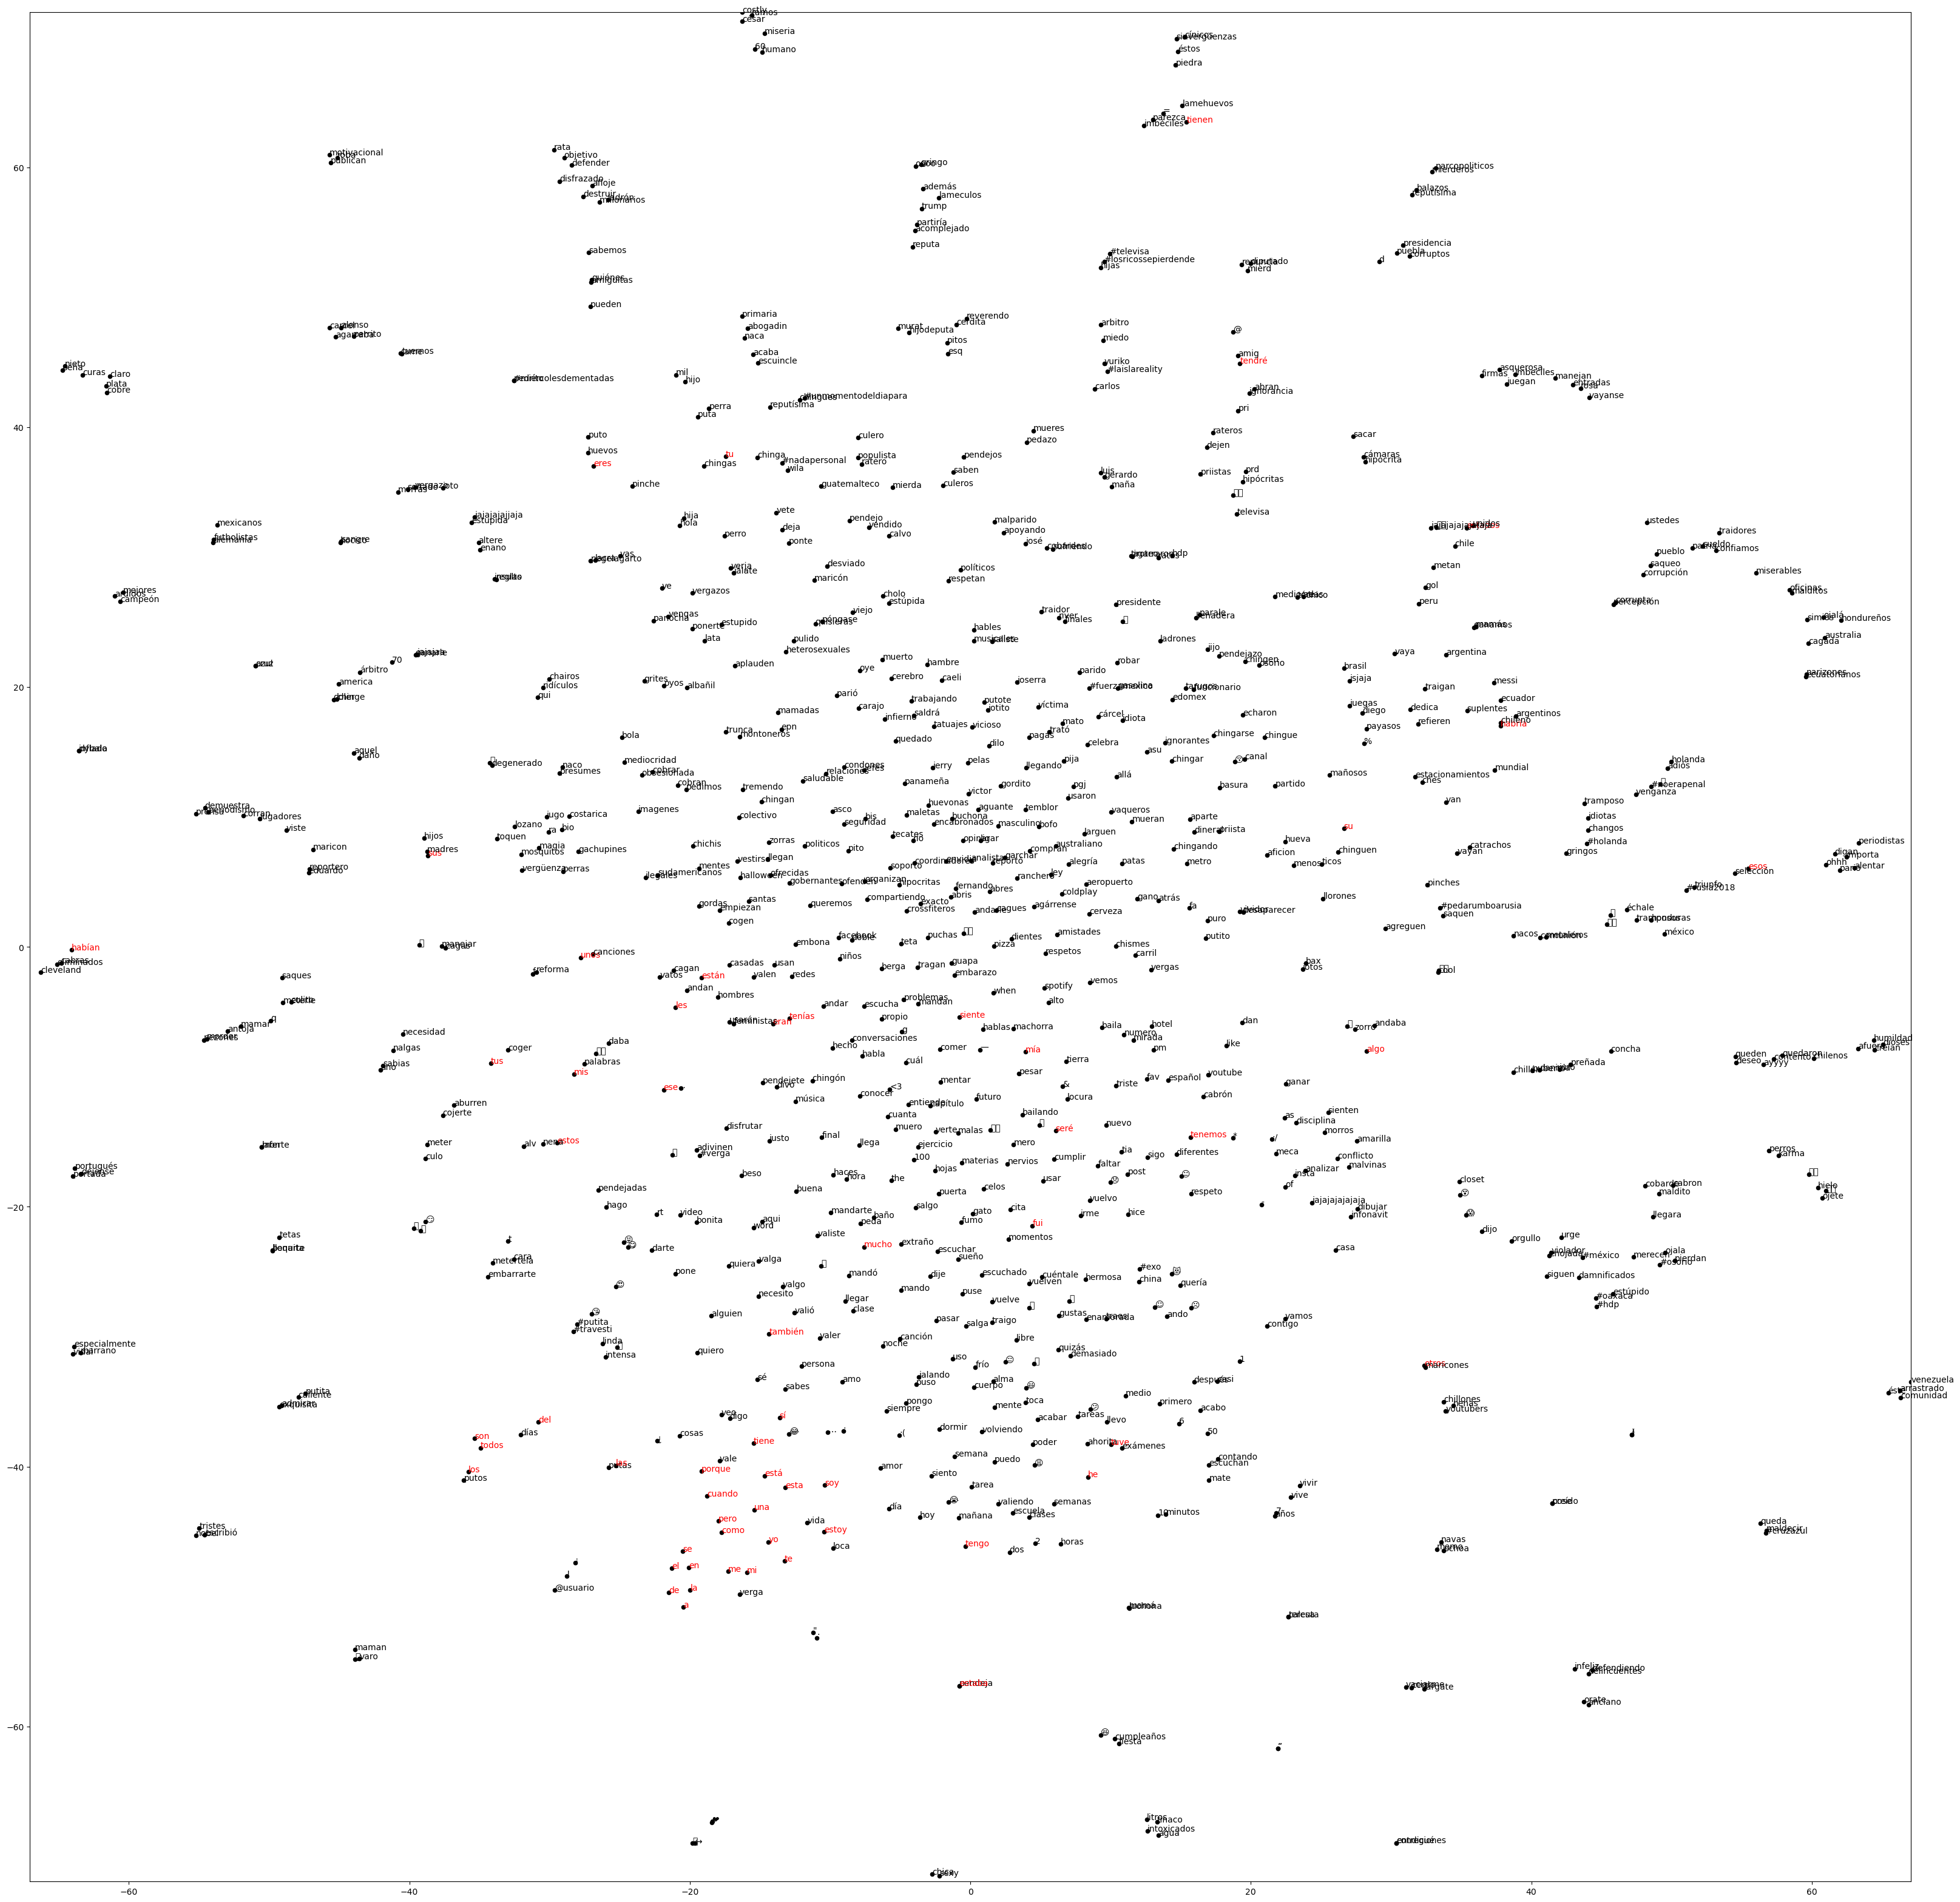

In [59]:
max_x = np.amax(reduced_matrix, axis=0)[0] #límites de la gráfica
max_y = np.amax(reduced_matrix, axis=0)[1]

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords 

sw = set(stopwords.words("spanish"))

plt.figure(figsize=(40, 40), dpi=100); 
plt.xlim((-max_x,max_x)); 
plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color="black");

for idx, word in enumerate(t_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]  
    if word in sw:
        plt.annotate(word, (x,y), color="red")
    else: 
        plt.annotate(word, (x,y), color="black")

In [114]:
import numpy as np

def contains(array, x): 
    index = array.searchsorted(x)
    return index < array.size and x == array[index]

def compute_tcor(BoW):
    size_voc = BoW.shape[1]
    TCOR = np.zeros((size_voc, size_voc), dtype=np.float)
    co_occur = np.zeros(size_voc, dtype=np.int)

    nonzero_values = []
    for row in BoW.T:
        nonzero_values.append(np.nonzero(row))

    for i in range(size_voc):
        for j in range(size_voc):
            if j>=i:   
                for element in nonzero_values[j][0]:
                    if contains(nonzero_values[i][0], element):
                        TCOR[i,j]+=1     
                TCOR[j,i] = TCOR[i,j]   
                if TCOR[i,j] > 0: co_occur[i] +=1        
                
    for k in range(size_voc):
        for j in range(size_voc):
            tff = (1 + np.log(TCOR[k,j])) if TCOR[k,j] > 0 else 0
            TCOR[k,j] = tff * np.log(size_voc/co_occur[k])

    return TCOR

In [107]:
len(tr_txt)


5544

In [115]:
import sys
import numpy
BOW_tr=build_bow_tr(tr_txt,V, dict_indices)
TCOR = compute_tcor(BOW_tr)

C:\Users\Ulises\AppData\Local\Temp\ipykernel_7404\3964568636.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  TCOR = np.zeros((size_voc, size_voc), dtype=np.float)
C:\Users\Ulises\AppData\Local\Temp\ipykernel_7404\3964568636.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://

In [116]:
TCOR

array([[1.748512  , 1.59747316, 1.56697616, ..., 0.        , 0.19820707,
        0.        ],
       [1.16698899, 1.28133417, 1.15067909, ..., 0.        , 0.        ,
        0.14479458],
       [2.09302526, 2.10393886, 2.28846387, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 8.51719319, 0.        ,
        0.        ],
       [8.51719319, 0.        , 0.        , ..., 0.        , 8.51719319,
        0.        ],
       [0.        , 8.51719319, 0.        , ..., 0.        , 0.        ,
        8.51719319]])

In [120]:
feats = SelectKBest(chi2, k=1000)
feats.fit(BOW_tr,tr_y) 
best = feats.get_support(indices=True)
dict_indice_invertido = {}
for w in dict_indices:
    dict_indice_invertido[dict_indices[w]] = w
target_words = [dict_indice_invertido[index] for index in best]
t_words = target_words
target_matrix_tcor = np.array([TCOR[dict_indices[word]] for word in t_words])

In [121]:
target_matrix_tcor

array([[1.16698899, 1.28133417, 1.15067909, ..., 0.        , 0.        ,
        0.14479458],
       [2.12337656, 2.09869805, 2.07698985, ..., 0.        , 0.27023516,
        0.27023516],
       [2.23290218, 2.26470892, 2.19025472, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 8.51719319, 8.51719319, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 7.82404601, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [8.51719319, 8.51719319, 8.51719319, ..., 0.        , 0.        ,
        0.        ]])

In [122]:
#similar a PCA
from tsne import tsne

reduced_matrix = tsne(target_matrix_tcor, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 11.610512
Iteration 10: error is 17.938252
Iteration 20: error is 16.589979
Iteration 30: error is 16.368755
Iteration 40: error is 16.389362
Iteration 50: error is 16.429796
Iteration 60: error is 16.415054
Iteration 70: error is 16.408558
Iteration 80: error is 16.410786
Iteration 90: error is 16.409267
Iteration 100: error is 16.409663
Iteration 110: error is 2.271555
Iteration 120: error is 1.815882
Iteration 130: error is 1.667361
Iteration 140: error is 1.583251
Iteration 150: error is 1.528147
Iteration 160: error is 1.489579
Iteration 170: error is 1.460515
Iteration 180: error is 1.437036
Iteration 190: error is 1.417846
Iteration 200: error is 1.402689
Iteration 210: error is 1.390122
Iteration 220: error is 1.379075
Iteration 230: error is 1.370135
Iteration 240: error is 1.362874
Iteration 250: error i

In [104]:
reduced_matrix

array([[-47.63299977, -25.08722516],
       [-48.67677379, -23.98539072],
       [-47.32181288, -23.56114333],
       ...,
       [ 31.05762518,  16.82487372],
       [ 18.12196092,  12.20352637],
       [-48.38642559, -58.41932976]])

c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127814 (\N{AUBERGINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128166 (\N{SPLASHING SWEAT SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulises\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ulis

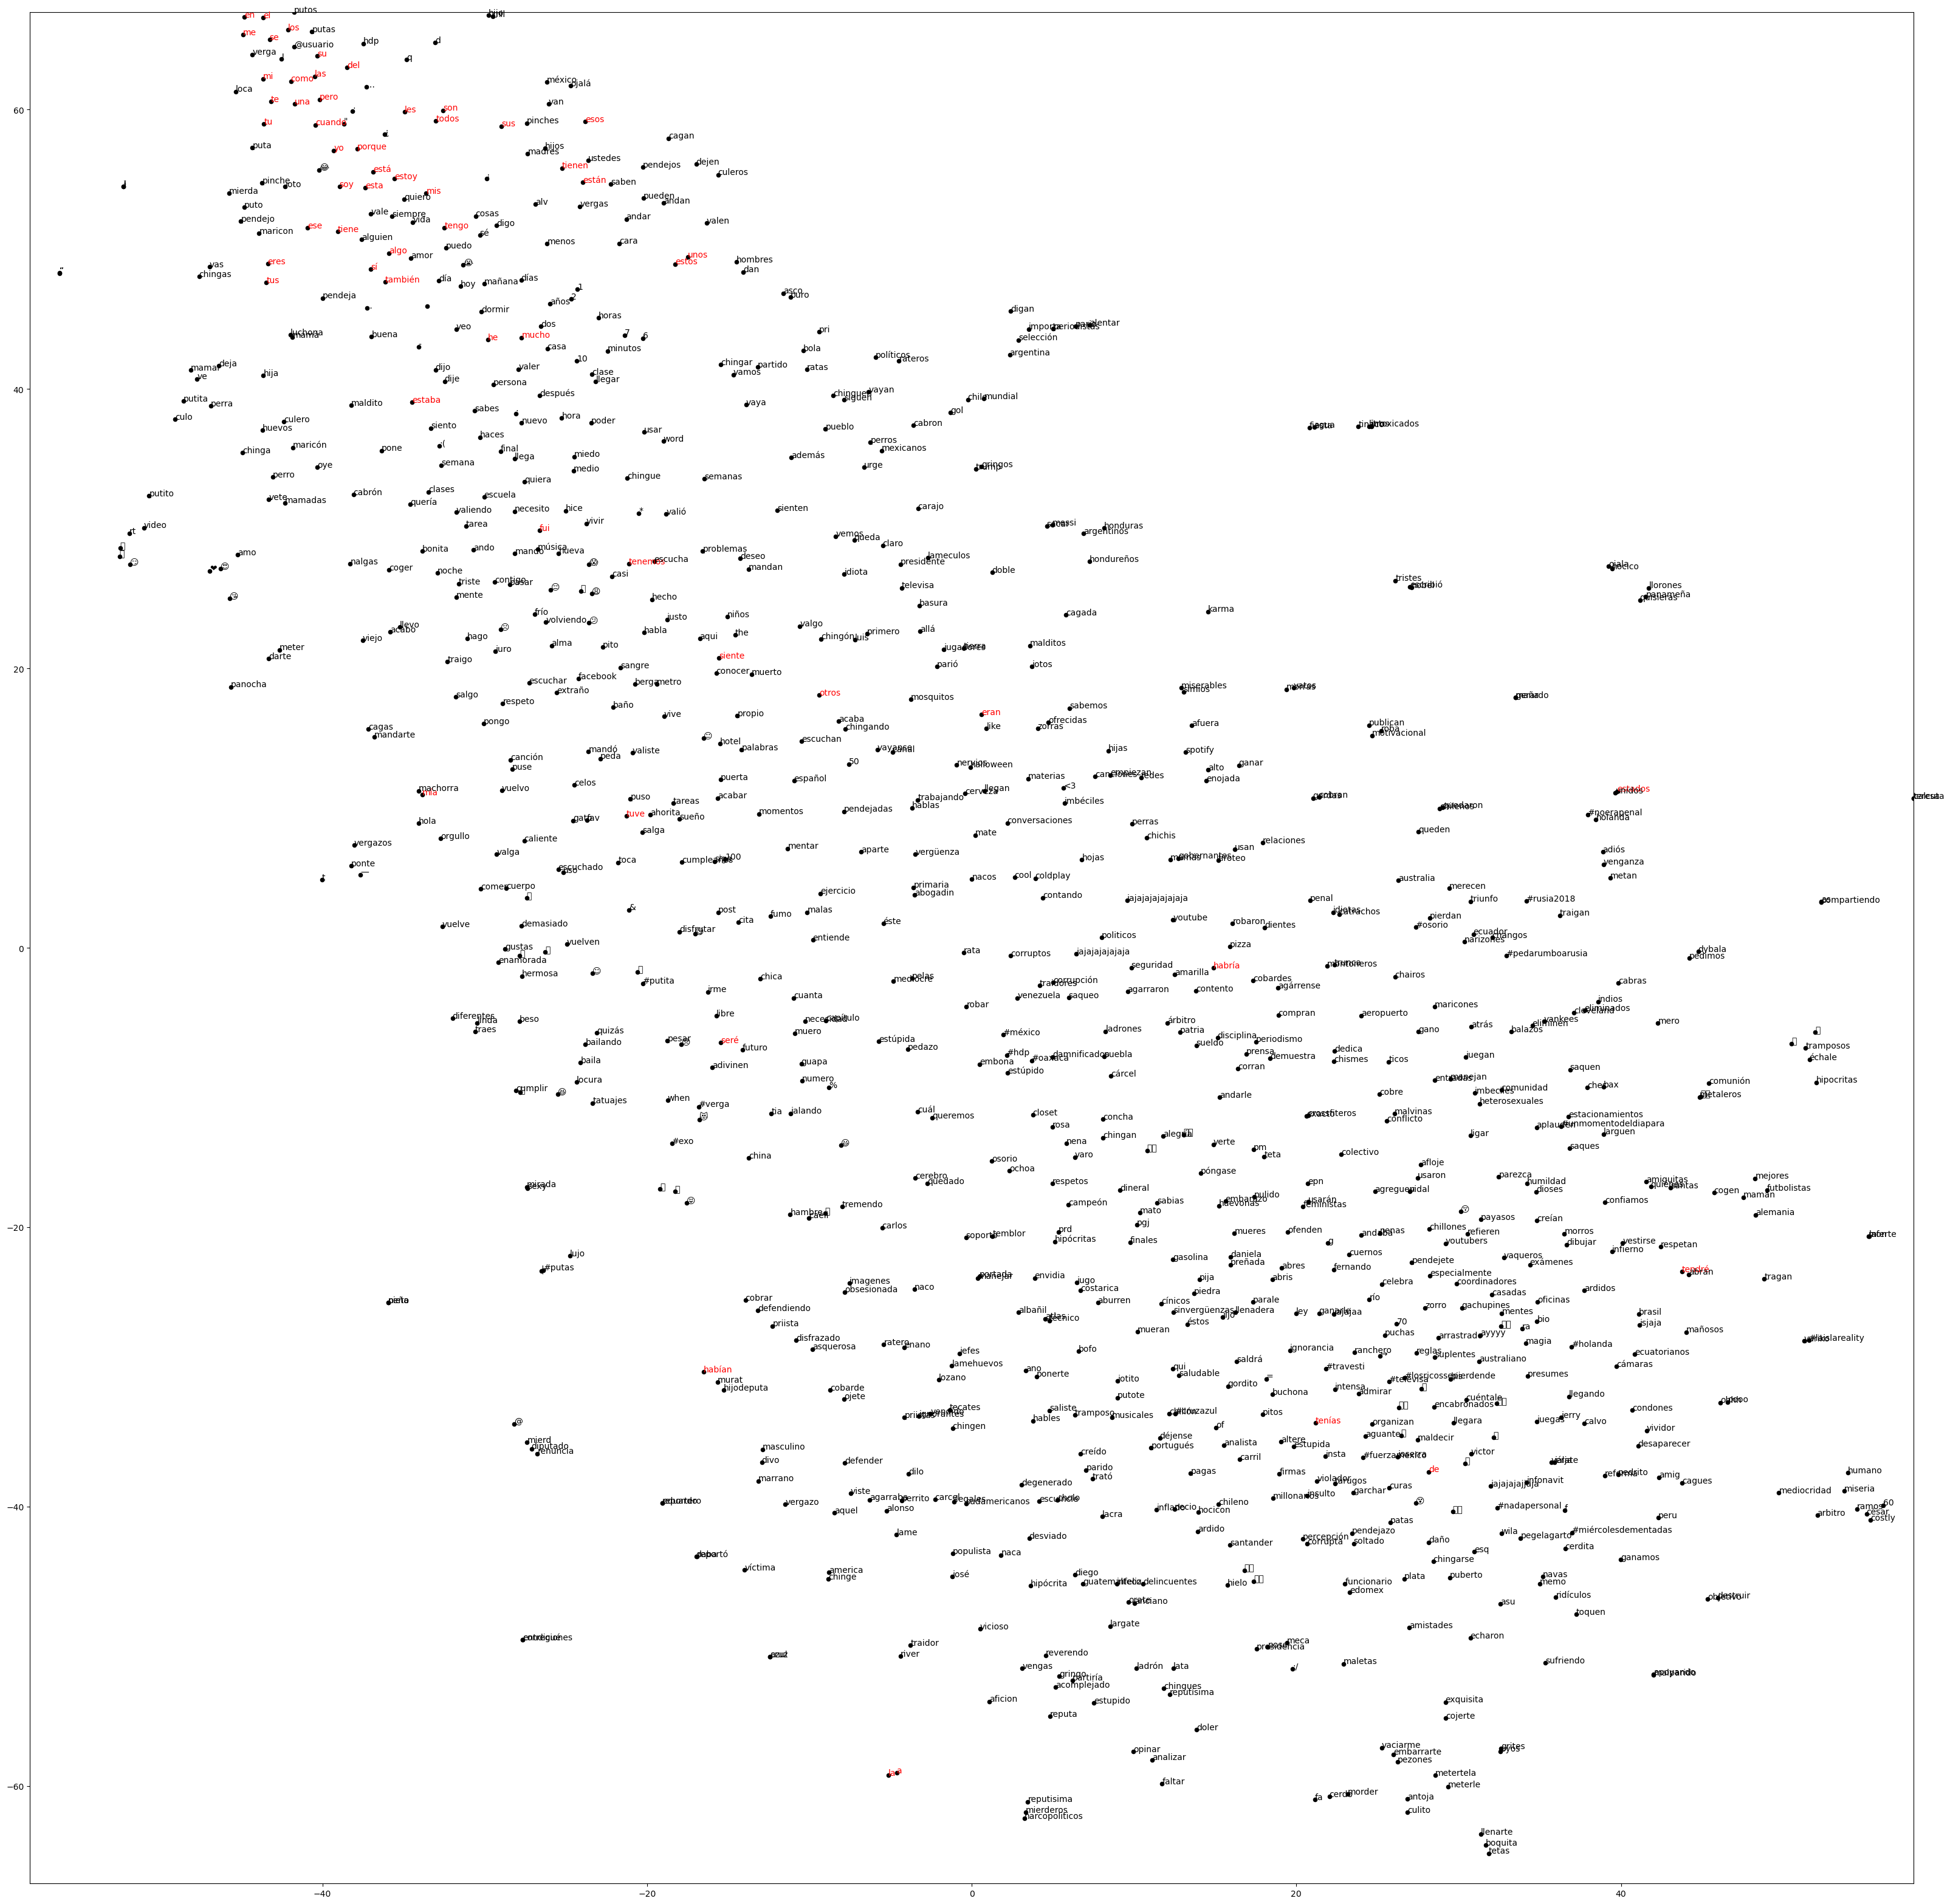

In [123]:
max_x = np.amax(reduced_matrix, axis=0)[0] #límites de la gráfica
max_y = np.amax(reduced_matrix, axis=0)[1]

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords 

sw = set(stopwords.words("spanish"))

plt.figure(figsize=(40, 40), dpi=100); 
plt.xlim((-max_x,max_x)); 
plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20, color="black");

for idx, word in enumerate(t_words[:]):
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]  
    if word in sw:
        plt.annotate(word, (x,y), color="red")
    else: 
        plt.annotate(word, (x,y), color="black")

# Diferencie entre DOR y TCOR

Por un lado, el TCOR puede ayudar a identificar cuáles son las palabras que se relacionan entre sí dentro del corpus, pues a través de la coocurrencia es posible saber si dos términos comparten un contexto similar. La idea es que las palabras que tengan un contexto similar tendrán significados similares. Se espera que entre más aparezcan juntos los dos términos más es la contribución semántica que aporta un término al otro. Un ejemplo más aterrizado según cómo se muestra la nube de palabras, los términos “Messi” y “argentinos” se encuentran muy cerca uno de otro, pues su correlación es alta, así como “Mediocridad” y “arbitro” o muchas otras palabras altisonantes dentro de los tweets en las redes sociales.
No obstante, existe una penalización en esta relación, pues si una palabra coocurre con muchas palabras distintas, entonces dicha palabra se vuelve menos relevante para explicar otro término. Y es que un término puede ser muy común en el corpus, pero puede que no esté realmente relacionado con el término que queremos explicar. Las stopwords son un claro ejemplo de esto, pues, aunque aparecen mucho (en este caso se resaltan en rojo), en realidad no brindan información útil para describir otras palabras, o incluso para poder clasificar un documento. 
Por otro lado, DOR proporciona más información semántica de los documentos al considerar qué tan representativa es cada palabra para describir dicho documento. Entre más diversificado sea el vocabulario del documento, más difícil será que una palabra describa mejor al documento. Cuando se tienen palabras como “puebla”, “presidencia”, “corruptos”, “narcopolíticos” y “balazos” es más fácil saber con algoritmos de clasificación a qué tópico podría pertenecer un tweet con esos términos, por ejemplo. 